In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
ads = pd.read_csv('Social_Network_Ads.csv')
ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [5]:
ads.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
x = ads[['Age', 'EstimatedSalary']]
y = ads['Purchased']

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled;

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=0, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

In [21]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [23]:
y_pred = svc.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

accuracy_score(y_test, y_pred)

0.89

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [29]:
log = LogisticRegression()
dt = DecisionTreeClassifier(random_state=0)
nb = GaussianNB()
rf = RandomForestClassifier(random_state=0)

In [31]:
log.fit(x_train, y_train)
dt.fit(x_train, y_train)
nb.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_pred_log = log.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [39]:
print('log=>', accuracy_score(y_test, y_pred_log))
print('dt=>', accuracy_score(y_test, y_pred_dt))
print('nb=>', accuracy_score(y_test, y_pred_nb))
print('rf=>', accuracy_score(y_test, y_pred_rf))

log=> 0.81
dt=> 0.84
nb=> 0.85
rf=> 0.87


In [41]:
# stacking

from sklearn.ensemble import StackingClassifier

In [45]:
stack = StackingClassifier(estimators=[('logistic', log),
                                      ('decision tree', dt),
                                      ('naive bayes', nb),
                                      ('sv', svc)],
                          final_estimator = SVC(kernel = 'rbf'))

In [47]:
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('logistic', LogisticRegression()),
                               ('decision tree',
                                DecisionTreeClassifier(random_state=0)),
                               ('naive bayes', GaussianNB()), ('sv', SVC())],
                   final_estimator=SVC())

In [49]:
y_pred = stack.predict(x_test)

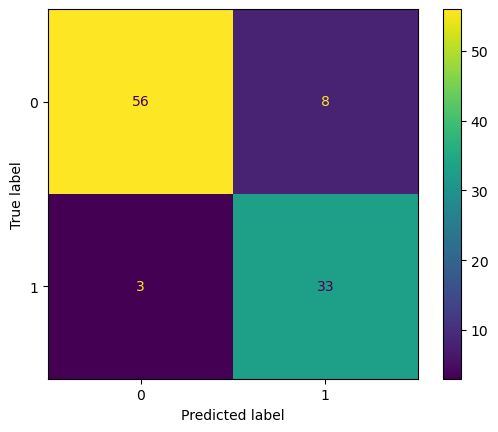

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [53]:
accuracy_score(y_test, y_pred)

0.89

In [67]:
# Voting
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('logistic', log),
                                      ('decision tree', dt),
                                      ('naive bayes', nb),
                                      ('sv', svc),
                                     ('rf', RandomForestClassifier(random_state=42))])

In [69]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('decision tree',
                              DecisionTreeClassifier(random_state=0)),
                             ('naive bayes', GaussianNB()), ('sv', SVC()),
                             ('rf', RandomForestClassifier(random_state=42))])

In [71]:
y_pred = voting.predict(x_test)

In [73]:
accuracy_score(y_test, y_pred)

0.88

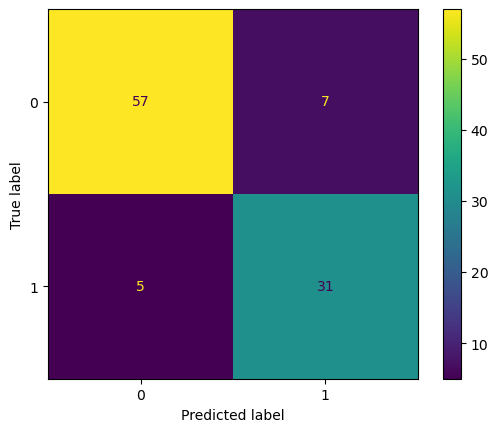

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)